## Exploratory Data Analysis
>This notebook shows some basic Exploratory Data Analysis about the dataset

### Objectives
0. Clean data
1. Which book is the most popular?
2. Which author is the most popular?
3. Which number wrote the biggest number of books?
4. Is number of pages correlated with ratings or number of reviews?
5. Which years had the biggest number of books written?
6. Is there tendency to reduce number of pages in nowaday books?

### Import libraries

In [1]:
import pandas as pd 
import polars as pl 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

### Load the data

In [2]:
books_df = pl.DataFrame(schema=pl.read_csv('dataset/book1000k-1100k.csv').schema)
books_df.head()

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews
i64,str,str,str,f64,i64,i64,i64,str,str,str,str,str,str,str,i64,str,i64,str,i64


In [3]:
import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        if '_' not in filename: # Ignore other files (eg: user rating)
            print(os.path.join(dirname, filename), 'loading...')
            books_df = pl.concat([books_df, pl.read_csv(os.path.join(dirname, filename))], how='diagonal')
            print(os.path.join(dirname, filename), 'OK')

dataset/book600k-700k.csv loading...
dataset/book600k-700k.csv OK
dataset/book300k-400k.csv loading...
dataset/book300k-400k.csv OK
dataset/book500k-600k.csv loading...
dataset/book500k-600k.csv OK
dataset/book700k-800k.csv loading...
dataset/book700k-800k.csv OK
dataset/book1800k-1900k.csv loading...
dataset/book1800k-1900k.csv OK
dataset/book2000k-3000k.csv loading...
dataset/book2000k-3000k.csv OK
dataset/book1400k-1500k.csv loading...
dataset/book1400k-1500k.csv OK
dataset/book100k-200k.csv loading...
dataset/book100k-200k.csv OK
dataset/book1500k-1600k.csv loading...
dataset/book1500k-1600k.csv OK
dataset/book1200k-1300k.csv loading...
dataset/book1200k-1300k.csv OK
dataset/book1300k-1400k.csv loading...
dataset/book1300k-1400k.csv OK
dataset/book1-100k.csv loading...
dataset/book1-100k.csv OK
dataset/book1700k-1800k.csv loading...
dataset/book1700k-1800k.csv OK
dataset/book1000k-1100k.csv loading...
dataset/book1000k-1100k.csv OK
dataset/book4000k-5000k.csv loading...
dataset/boo

### Data preparation

In [4]:
books_df.sort('Id')
books_df.head()

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
i64,str,str,str,f64,i64,i64,i64,str,str,str,str,str,str,str,i64,str,i64,str,i64,i64
600000,"""Lessons Learne…","""Nora Roberts""","""037351025X""",3.74,1993,15,2,"""Silhouette""","""5:947""","""4:1016""","""3:1061""","""2:287""","""1:63""","""total:3374""",86,"""eng""",250,"""LESSONS LEARNE…",null,null
600001,"""Walking by Fai…","""Jennifer Roths…","""0633099325""",4.27,2003,1,1,"""Lifeway Church…","""5:367""","""4:246""","""3:109""","""2:22""","""1:5""","""total:749""",7,null,112,"""At the age of …",null,null
600003,"""Better Health …","""World Bank Gro…","""0821328174""",5.0,1994,1,1,"""World Bank Pub…","""5:1""","""4:0""","""3:0""","""2:0""","""1:0""","""total:1""",1,null,240,null,null,null
600004,"""The Blended Le…","""Josh Bersin""","""0787972967""",4.1,2004,1,10,"""Pfeiffer""","""5:8""","""4:6""","""3:6""","""2:0""","""1:0""","""total:20""",3,null,319,"""<i>The Blended…",null,null
600005,"""Lessons Learne…","""Robert G. Gill…","""0595417566""",3.0,2006,30,11,"""iUniverse""","""5:0""","""4:0""","""3:1""","""2:0""","""1:0""","""total:1""",0,null,168,"""""<b>Lessons Le…",null,null


In [5]:
books_df.shape

(1850310, 21)

In [6]:
books_df.schema

{'Id': Int64,
 'Name': Utf8,
 'Authors': Utf8,
 'ISBN': Utf8,
 'Rating': Float64,
 'PublishYear': Int64,
 'PublishMonth': Int64,
 'PublishDay': Int64,
 'Publisher': Utf8,
 'RatingDist5': Utf8,
 'RatingDist4': Utf8,
 'RatingDist3': Utf8,
 'RatingDist2': Utf8,
 'RatingDist1': Utf8,
 'RatingDistTotal': Utf8,
 'CountsOfReview': Int64,
 'Language': Utf8,
 'pagesNumber': Int64,
 'Description': Utf8,
 'Count of text reviews': Int64,
 'PagesNumber': Int64}

- There are a lot of numerical data, that was interpreted as string object.
- Rating columns (RatingDist1->5, RatingDistTotal) start with prefixes like '5:', '4:', 'total:'. This infomation needs removing.
- PublishMonth = 16 (???). Maybe the data was wrongly associated.
- There are lots of missing values in Language, Description and Count of text reviews.
- Misconception of column 'pagesNumber' and 'PagesNumber', need joining again.
- There are some missing data even if we join 'pagesNumber' and 'PagesNumber'

#### Name

In [7]:
books_df['Name'].n_unique()

1636235

Not all the names are unique. Probably there are some books that were published with the same name, bur from different Publishers

In [8]:
books_df.filter(books_df['Name'].is_duplicated()).sort('Name')

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
i64,str,str,str,f64,i64,i64,i64,str,str,str,str,str,str,str,i64,str,i64,str,i64,i64
560791,"""""A Trade Like …","""Karin van Nieu…","""0292787235""",4.33,1995,1,1,"""University of …","""5:26""","""4:16""","""3:9""","""2:0""","""1:0""","""total:51""",6,null,240,null,null,null
3529667,"""""A Trade Like …","""Karin van Nieu…","""0292787200""",4.33,1995,1,1,"""University of …","""5:26""","""4:17""","""3:9""","""2:0""","""1:0""","""total:52""",0,null,null,"""In Egypt, sing…",null,226
2340088,"""""Ace"" Any Test…","""Ron Fry""","""1564144607""",2.89,2000,7,1,"""Career Press""","""5:0""","""4:5""","""3:7""","""2:5""","""1:1""","""total:18""",0,null,null,"""Shows how to c…",null,124
3573192,"""""Ace"" Any Test…","""Ron Fry""","""1564140792""",2.95,1994,8,1,"""Career Press""","""5:0""","""4:6""","""3:7""","""2:5""","""1:1""","""total:19""",0,null,null,"""Testy on test …",null,128
362418,"""""After Mecca"":…","""Cheryl Clark""","""0813534062""",4.19,2004,24,11,"""Rutgers Univer…","""5:7""","""4:5""","""3:4""","""2:0""","""1:0""","""total:16""",3,null,224,null,null,null
3624004,"""""After Mecca"":…","""Cheryl A. Clar…","""0813534054""",4.13,2004,11,22,"""Rutgers Univer…","""5:6""","""4:5""","""3:4""","""2:0""","""1:0""","""total:15""",0,null,null,"""The politics a…",null,224
7940,"""""B"" Is for Bet…","""Carolyn Haywoo…","""015205099X""",4.04,2004,1,5,"""HMH Books for …","""5:1980""","""4:1267""","""3:868""","""2:240""","""1:157""","""total:4512""",122,null,144,null,null,null
3109984,"""""B"" Is for Bet…","""Carolyn Haywoo…","""0152051031""",4.04,2004,5,1,"""HMH Books for …","""5:1987""","""4:1281""","""3:875""","""2:238""","""1:158""","""total:4539""",0,null,null,"""Carolyn Haywoo…",null,144
2503072,"""""Baad Bitches""…","""Stephane Dunn""","""025207548X""",4.0,2008,8,4,"""University of …","""5:6""","""4:9""","""3:3""","""2:0""","""1:1""","""total:19""",3,null,null,"""This lively st…",null,192


True. A lot of books were published multiple times. However, let's check 100% duplicates

In [9]:
books_df.filter(books_df.is_duplicated())

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
i64,str,str,str,f64,i64,i64,i64,str,str,str,str,str,str,str,i64,str,i64,str,i64,i64
76770,"""Recommended Di…","""National Resea…","""0309046335""",0.0,1989,1,2,"""National Acade…","""5:0""","""4:0""","""3:0""","""2:0""","""1:0""","""total:0""",0,null,302,null,null,null
76772,"""The Circle Com…","""Merwyn Borders…","""1577360877""",0.0,1998,1,1,"""Providence Hou…","""5:0""","""4:0""","""3:0""","""2:0""","""1:0""","""total:0""",0,null,400,null,null,null
76773,"""The God We Nev…","""Marcus J. Borg…","""0060610352""",4.21,2015,19,5,"""HarperOne""","""5:335""","""4:279""","""3:103""","""2:25""","""1:7""","""total:749""",65,null,192,null,null,null
76774,"""Living the Hea…","""Marcus J. Borg…","""0061118427""",4.1,2006,31,10,"""HarperOne""","""5:23""","""4:26""","""3:8""","""2:3""","""1:1""","""total:61""",2,null,180,null,null,null
76784,"""A Stone of the…","""John Brady""","""0140138471""",3.33,1990,1,8,"""Penguin Books""","""5:10""","""4:36""","""3:28""","""2:13""","""1:6""","""total:93""",0,null,256,null,null,null
76785,"""A Carra King (…","""John Brady""","""1586420186""",3.45,2015,15,10,null,"""5:6""","""4:18""","""3:13""","""2:4""","""1:3""","""total:44""",6,"""eng""",548,null,null,null
76790,"""Holiday Pumpki…","""Georgeanne Bre…","""0765108151""",4.0,1998,1,8,"""Smithmark Publ…","""5:1""","""4:3""","""3:1""","""2:0""","""1:0""","""total:5""",0,null,112,null,null,null
76791,"""Otherness""","""David Brin""","""0553295284""",3.78,2009,23,12,"""Bantam Spectra…","""5:356""","""4:641""","""3:527""","""2:80""","""1:6""","""total:1610""",43,"""eng""",358,null,null,null
76793,"""101 Essential …","""John Brookes""",null,3.2,1996,23,5,null,"""5:0""","""4:2""","""3:2""","""2:1""","""1:0""","""total:5""",2,null,72,null,null,null


In the above output we saw 300k duplicated names, and here's 224 entirely duplicated. In this context I'll drop rows that are duplicated 100%.

In [10]:
books_df = books_df.unique()
books_df.shape # Reduce 224/2 = 112 rows

(1850198, 21)

Text(0, 0.5, 'Number of books')

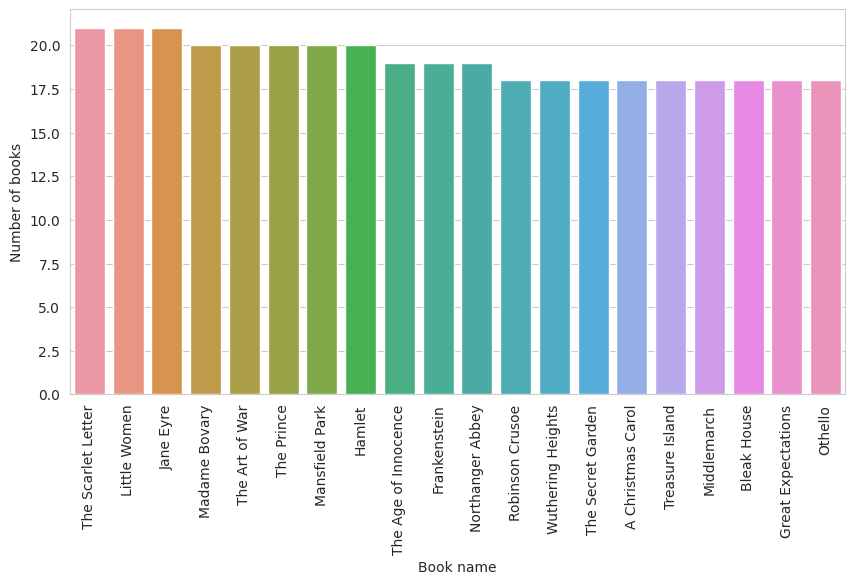

In [11]:
plt.figure(figsize=(10, 5))
popular_names = sns.barplot(
    x=books_df.filter(books_df[['Name', 'Authors']].is_duplicated())['Name'].value_counts().sort('counts', descending=True).head(20).to_pandas().Name,
    y=books_df.filter(books_df[['Name', 'Authors']].is_duplicated())['Name'].value_counts().sort('counts', descending=True).head(20).to_pandas().counts
)
popular_names.set_xticklabels(popular_names.get_xticklabels(), rotation=90)
popular_names.set_xlabel('Book name')
popular_names.set_ylabel('Number of books')

So there are a lot of common names, that were used for several books, that are not related to each other.

#### Authors

In [12]:
books_df.n_unique()/books_df['Authors'].n_unique()

2.739861007657462

So there're about 2.7 times less authors than books. Can we say in average 1 author wrote 3 books? Let's find the best productive authors

In [13]:
books_df.groupby('Authors').agg(pl.col('Name').count()).sort('Name', descending=True).head()

Authors,Name
str,u32
"""Anonymous""",2893
"""Unknown""",2029
"""William Shakes…",1373
"""Francine Pasca…",930
"""Agatha Christi…",885


Excellent! Here's William Shakespeare's the most productive author. Also, we can see that poems owns top spot in the book-counting chart above.

Some N/A value we can see: Anonymous, Unknown, Various, NOT A BOOK

#### ISBN

In [14]:
books_df['ISBN'].null_count()

5922

Books seem to be find and I don't want to remove them, but since I also can't replace missing values with anything, so leave it as it is for now

#### Rating

In [15]:
books_df['Rating'].describe()

statistic,value
str,f64
"""min""",0.0
"""max""",5.0
"""null_count""",0.0
"""mean""",2.894194
"""std""",1.725043
"""count""",1.850198e6


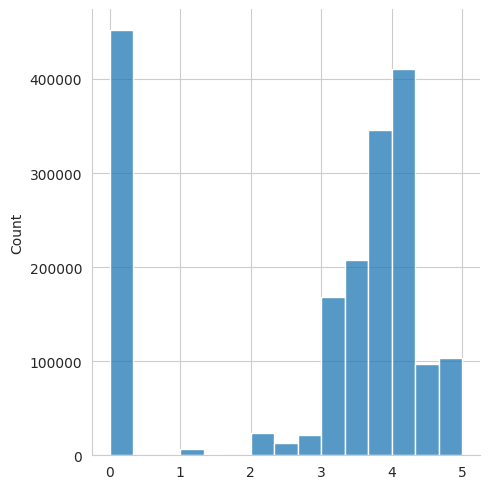

In [16]:
sns.displot(books_df['Rating'], bins=15, kde=False)

So mostly there is either no rating, or quite good one with average ~4. If we omit 0 ratings, then distribution is negatively skewed, which is quite typical for rankings of services

#### Time data: PublishYear, PublishMonth, PublishDay

In [17]:
books_df.replace('PublishDay', books_df['PublishDay'].shrink_dtype())
books_df.replace('PublishMonth', books_df['PublishMonth'].shrink_dtype())
books_df.replace('PublishYear', books_df['PublishYear'].shrink_dtype())
books_df.schema

{'Id': Int64,
 'Name': Utf8,
 'Authors': Utf8,
 'ISBN': Utf8,
 'Rating': Float64,
 'PublishYear': Int32,
 'PublishMonth': Int8,
 'PublishDay': Int8,
 'Publisher': Utf8,
 'RatingDist5': Utf8,
 'RatingDist4': Utf8,
 'RatingDist3': Utf8,
 'RatingDist2': Utf8,
 'RatingDist1': Utf8,
 'RatingDistTotal': Utf8,
 'CountsOfReview': Int64,
 'Language': Utf8,
 'pagesNumber': Int64,
 'Description': Utf8,
 'Count of text reviews': Int64,
 'PagesNumber': Int64}

In [18]:
books_df[['PublishDay', 'PublishMonth', 'PublishYear']].describe()

describe,PublishDay,PublishMonth,PublishYear
str,f64,f64,f64
"""count""",1.850198e6,1.850198e6,1.850198e6
"""null_count""",0.0,0.0,0.0
"""mean""",7.987328,7.700395,1997.841519
"""std""",8.431971,7.756715,87.897239
"""min""",1.0,1.0,1.0
"""max""",31.0,31.0,65535.0
"""median""",5.0,6.0,2000.0


- Min and max year looks strange

- Max month is 31, also, mean of day seems strange

In [19]:
books_df['PublishYear'].unique()

PublishYear
i32
1
8
162
199
200
202
208
299
1192


- Year 1, 8, 162, 199, 200, 202, 208, 299, 2030, 2035, ... are wrong

- Year 2022 and 2021 need further inspecting

In [20]:
books_df['PublishYear'].value_counts()

PublishYear,counts
i32,u32
1376,1
1952,145
1896,2
1920,145
20040,1
1880,1
1912,17
1192,1
2016,1069


Let's just take the books from 1700 to 2021 because others seem suspicious

In [21]:
books_df = books_df.sort('PublishYear')

In [22]:
low = books_df.filter(books_df['PublishYear'] < 1700).shape[0]
high = books_df.filter(books_df['PublishYear'] > 2021).shape[0]

In [23]:
books_df = books_df[low:len(books_df)-high]

In [24]:
books_df['PublishYear'].value_counts()

PublishYear,counts
i32,u32
1730,1
1753,2
1824,1
1825,1
1833,1
1835,2
1836,1
1837,1
1838,1


#### Publisher

In [25]:
books_df.filter(books_df['Publisher'].is_null()).head()

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,str,str,str,str,str,str,i64,str,i64,str,i64,i64
3088068,"""Godey's Lady's…","""Various""","""1426484372""",2.0,1851,10,28,null,"""5:0""","""4:0""","""3:0""","""2:2""","""1:0""","""total:2""",0,null,null,"""This is a pre-…",null,220
1424633,"""An Appeal in v…","""Alfred H. Love…","""1429753579""",0.0,1862,1,1,null,"""5:0""","""4:0""","""3:0""","""2:0""","""1:0""","""total:0""",0,null,24,null,0,null
2619182,"""French for Mas…","""Jean-Paul Vale…","""0669200832""",3.4,1900,1,1,null,"""5:0""","""4:4""","""3:0""","""2:0""","""1:1""","""total:5""",1,"""eng""",null,null,null,480
2802465,"""Foundations of…","""McDougal Litte…","""0669403636""",0.0,1900,1,1,null,"""5:0""","""4:0""","""3:0""","""2:0""","""1:0""","""total:0""",0,null,null,null,null,544
194155,"""Dime Uno Cuade…","""Fabián A. Sama…","""0669433470""",4.0,1900,1,1,null,"""5:4""","""4:0""","""3:2""","""2:1""","""1:0""","""total:7""",0,null,0,null,null,null


In [26]:
books_df['Publisher'].n_unique()

79419

A lot of books. Also books with good ratings, I should not remove them

In [27]:
# Which publisher issued the biggest variety of books
books_df['Publisher'].value_counts()

Publisher,counts
str,u32
"""Vintage Press""",1
"""Carraig Books""",1
"""Grove's Dictio…",4
"""Éditions La Dé…",3
"""Chrysalis Chil…",16
"""Roberta Gregor…",1
"""Quai Voltaire""",13
"""World Almanac …",44
"""Blake Publishi…",2


- Missing value: Not Avail, Unknown, Not Specified, Not Applicable, ...

#### RatingDist (1, 2, 3, 4, 5, total)

In [28]:
books_df.head(3)

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,str,str,str,str,str,str,i64,str,i64,str,i64,i64
3098402,"""Three Distinct…","""Samuel Pritcha…","""1419163108""",0.0,1730,12,1,"""Kessinger Publ…","""5:0""","""4:0""","""3:0""","""2:0""","""1:0""","""total:0""",0,null,null,null,null,80
2448024,"""Discovering Ge…","""Michael Serra""","""1559532009""",3.67,1753,1,1,"""Kendall/Hunt P…","""5:1""","""4:1""","""3:0""","""2:1""","""1:0""","""total:3""",1,null,null,null,null,834
4265642,"""Self Esteem In…","""Lila Swell""","""0840360134""",0.0,1753,1,1,"""Kendall/Hunt P…","""5:0""","""4:0""","""3:0""","""2:0""","""1:0""","""total:0""",0,null,null,null,null,170


Get rid of redundant parts like '5:', '4:', 'total:', ...

In [29]:
books_df = books_df.with_columns(books_df['RatingDist1'].apply(lambda rating: rating.split(':')[1]).cast(pl.Int32))
books_df = books_df.with_columns(books_df['RatingDist2'].apply(lambda rating: rating.split(':')[1]).cast(pl.Int32))
books_df = books_df.with_columns(books_df['RatingDist3'].apply(lambda rating: rating.split(':')[1]).cast(pl.Int32))
books_df = books_df.with_columns(books_df['RatingDist4'].apply(lambda rating: rating.split(':')[1]).cast(pl.Int32))
books_df = books_df.with_columns(books_df['RatingDist5'].apply(lambda rating: rating.split(':')[1]).cast(pl.Int32))
books_df = books_df.with_columns(books_df['RatingDistTotal'].apply(lambda rating: rating.split(':')[1]).cast(pl.Int32))
books_df[['RatingDistTotal', 'RatingDist1', 'RatingDist2', 'RatingDist3', 'RatingDist4', 'RatingDist5']].describe()

describe,RatingDistTotal,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5
str,f64,f64,f64,f64,f64,f64
"""count""",1.850149e6,1.850149e6,1.850149e6,1.850149e6,1.850149e6,1.850149e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",4079.614346,94.402791,207.246389,754.638235,1305.846063,1717.480868
"""std""",71662.082866,2227.034126,3567.509688,11238.758305,20767.199856,37288.463405
"""min""",-2.0,0.0,0.0,0.0,0.0,-2.0
"""max""",7.094687e6,550388.0,544093.0,1.013165e6,1.912159e6,4.608992e6
"""median""",5.0,0.0,0.0,1.0,2.0,1.0


Looks better

#### Counts of reviews and Count of text reviews

In [30]:
books_df['CountsOfReview'].describe()

statistic,value
str,f64
"""min""",0.0
"""max""",154447.0
"""null_count""",0.0
"""mean""",11.580386
"""std""",295.280151
"""count""",1.850149e6


In [31]:
books_df['CountsOfReview'].value_counts()

CountsOfReview,counts
i64,u32
1552,3
40,1185
240,48
2504,1
640,9
2632,1
1024,4
2744,1
2088,1


In [32]:
books_df = books_df.rename({'Count of text reviews': 'CountOfTextReviews'})
books_df['CountOfTextReviews'].describe()

statistic,value
str,f64
"""min""",0.0
"""max""",43652.0
"""null_count""",1.440462e6
"""mean""",7.172849
"""std""",124.840352
"""count""",1.850149e6


#### Language

In [33]:
books_df['Language'].unique()

Language
str
"""yid"""
"""tgl"""
"""nl"""
"""elx"""
"""grc"""
"""aze"""
"""epo"""
"""zul"""
"""ada"""


- These eng, en-US, en-CA, en-GB are all English

- Replace 'nl' with 'nld' (Dutch language)

- '--' and 'nan' needs investigating

In [34]:
books_df = books_df.with_columns(books_df['Language'].str.replace('en-US', 'eng')
                                                    .str.replace('en-GB', 'eng')
                                                    .str.replace('en-CA', 'eng')
                                                    .str.replace('nl', 'nld')
                                )

In [35]:
books_df.with_row_count().filter(books_df['Language'] == '--')

row_nr,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,CountOfTextReviews,PagesNumber
u32,i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,i64,str,i64,i64
76743,2130696,"""Montes de Oca""","""Benito Pérez G…","""8420650285""",3.48,1978,6,30,"""Alianza""",2,14,9,4,0,29,1,"""--""",null,"""El gran friso …",null,164
87395,2053807,"""Aita Tettauen""","""Benito Pérez G…","""8420650366""",3.75,1979,6,30,"""Alianza""",6,12,8,1,1,28,1,"""--""",null,"""El gran friso …",null,208
87554,2130683,"""Carlos VI en l…","""Benito Pérez G…","""8420650374""",3.89,1979,6,30,"""Alianza : Hern…",6,6,4,2,0,18,1,"""--""",null,null,null,187
140767,2098073,"""The Persona in…","""Martin M. Wink…","""3487074370""",4.0,1983,1,1,"""Olms""",0,1,0,0,0,1,0,"""--""",null,null,null,248
266642,211273,"""The Dinosaur H…","""Robert T. Bakk…","""0140100555""",4.19,1988,1,1,"""Zebra""",932,710,317,75,23,2057,2,"""--""",480,null,null,null
605100,2383967,"""Fama o bicikli…","""Svetislav Basa…","""8681283715""",4.04,1996,1,1,"""Dereta""",239,219,114,33,11,616,8,"""--""",null,"""""След като изл…",null,284
936683,4105709,"""Woodland Anima…","""Patricia Walsh…","""1575723522""",4.25,2000,11,22,"""Heinemann Educ…",2,1,1,0,0,4,1,"""--""",null,"""Aspiring artis…",null,32
1039528,806815,"""Did You Say Tw…","""Maureen Child""","""0373764081""",3.35,2001,23,11,"""Silhouette Des…",16,19,32,15,3,85,7,"""--""",192,"""Top-secret mil…",7,null
1245235,3354455,"""Marcel Van Eed…","""Institut für m…","""3936711097""",4.5,2003,7,4,"""Verlag für mod…",1,1,0,0,0,2,0,"""--""",null,"""Niederländisch…",null,224


In [36]:
books_df[[140767, 266642, 936683, 1039528, 1778888], 'Language'] = 'eng'
books_df[1831058, 'Language'] = 'null'
books_df[[76743, 87395, 87554], 'Language'] = 'spa'
books_df[605100, 'Language'] = 'srp'
books_df[1245235, 'Language'] = 'ger'
books_df[1442947, 'Language'] = 'cat'
books_df[1696459, 'Language'] = 'swe'

In [37]:
books_df['Language'].value_counts().sort('counts', descending=True)

Language,counts
str,u32
null,1598375
"""eng""",209643
"""fre""",16321
"""ger""",11467
"""spa""",7247
"""jpn""",2059
"""ita""",1156
"""mul""",417
"""por""",406


Text(0, 0.5, 'Language')

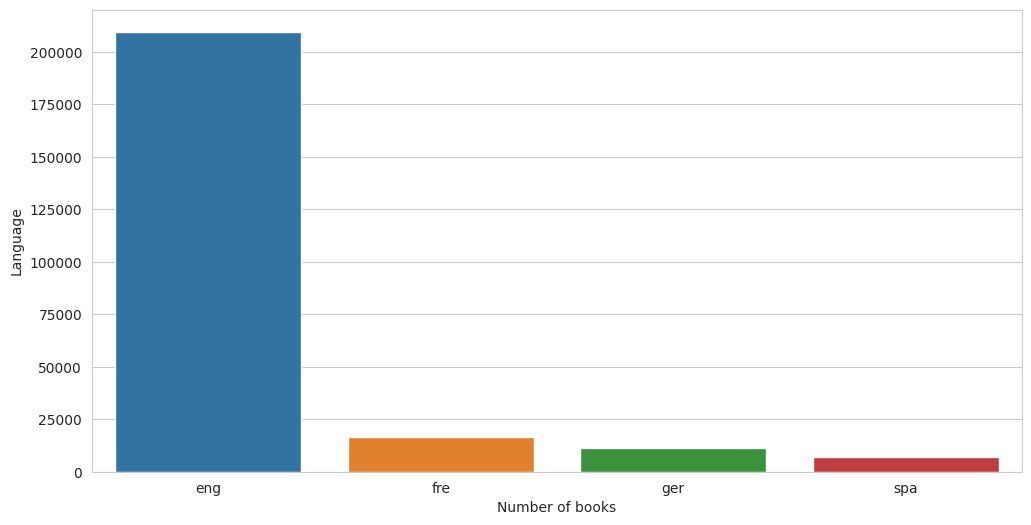

In [38]:
plt.figure(figsize = (12,6))
langs = sns.barplot(
    x = books_df['Language'].value_counts().sort('counts', descending=True).head(5)['Language'].to_pandas(),
    y = books_df['Language'].value_counts().sort('counts', descending=True).head(5)['counts'].to_pandas()
)
langs.set_xlabel('Number of books')
langs.set_ylabel('Language')

#### Pages Number

In [39]:
books_df = books_df.with_columns(books_df['PagesNumber'].fill_null(books_df['pagesNumber']))
books_df['PagesNumber'].null_count()

0

In [40]:
books_df['PagesNumber'].describe()

statistic,value
str,f64
"""min""",0.0
"""max""",4.517845e6
"""null_count""",0.0
"""mean""",276.552045
"""std""",5006.23687
"""count""",1.850149e6


And drop column 'pagesNumber'

In [41]:
books_df = books_df.drop(columns=['pagesNumber'])
books_df.schema

{'Id': Int64,
 'Name': Utf8,
 'Authors': Utf8,
 'ISBN': Utf8,
 'Rating': Float64,
 'PublishYear': Int32,
 'PublishMonth': Int8,
 'PublishDay': Int8,
 'Publisher': Utf8,
 'RatingDist5': Int32,
 'RatingDist4': Int32,
 'RatingDist3': Int32,
 'RatingDist2': Int32,
 'RatingDist1': Int32,
 'RatingDistTotal': Int32,
 'CountsOfReview': Int64,
 'Language': Utf8,
 'Description': Utf8,
 'CountOfTextReviews': Int64,
 'PagesNumber': Int64}

It was expected that the average number of pages is between 200-300 pages (mean - 176, median - 239). However it seems strange for books with million number of pages

In [42]:
books_df.filter(books_df['PagesNumber'] > 100_000)

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64
179017,"""Sholokhov's Ti…","""A.B. Murphy""","""0704417707""",5.0,1997,31,12,"""Department of …",3,0,0,0,0,3,0,null,null,null,2254246
2538668,"""Another 425 H…","""Sandy Redburn""","""0969941064""",0.0,1999,5,6,"""Crafty Secrets…",0,0,0,0,0,0,0,null,null,null,4517845
1634966,"""425 Heartwarmi…","""Sandy Redburn""","""0969941048""",0.0,1999,25,4,"""Crafty Secrets…",0,0,0,0,0,0,0,null,"""This first boo…",0,4517845
3199266,"""Internet Sacre…","""John B. Hare""","""0970939043""",4.5,2004,9,1,"""Sacred-texts.c…",1,1,0,0,0,2,0,null,null,null,500000
1870280,"""2006 Essential…","""Progressive Ma…","""1422004694""",0.0,2006,1,15,"""Progressive Ma…",0,0,0,0,0,0,0,"""eng""","""This unique el…",null,107490
163162,"""2006 Iran Nucl…","""Progressive Ma…","""1422004805""",0.0,2006,15,1,"""Progressive Ma…",0,0,0,0,0,0,0,null,null,null,205141


To avoid such a big ourliers let's remove these books with more than 100,000 pages

In [43]:
books_df = books_df.sort('PagesNumber')
n = books_df.filter(books_df['PagesNumber'] > 100_000).shape[0]
n

6

In [44]:
books_df = books_df[:len(books_df)-n]
books_df.tail()

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64
163161,"""2006 Iranian N…","""U.S. Governmen…","""1422005003""",0.0,2006,17,1,"""Progressive Ma…",0,0,0,0,0,0,0,"""eng""",null,null,63987
4538171,"""Gourmet's Menu…","""Gourmet Magazi…","""0394540328""",5.0,1984,10,12,"""Knopf""",5,0,0,0,0,5,0,null,null,null,65224
733737,"""Lisa and David…","""Theodore Isaac…","""0345331079""",3.65,1973,12,3,"""Ballantine Boo…",28,53,42,13,3,139,0,null,"""Two stories ab…",0,80300
907355,"""Lifelines""","""Edith Schaeffe…","""034531154X""",3.78,1983,12,12,"""Ballantine Boo…",3,8,7,0,0,18,0,null,"""The Ten Comman…",0,80500
3247146,"""Scholar's Libr…","""Logos Research…","""1577990773""",0.0,2001,10,1,"""Logos Research…",0,0,0,0,0,0,0,"""eng""","""Scholar's Libr…",null,100000


#### Description

In [45]:
books_df['Description'].n_unique()

1083670

There are a lot of missing values in this column, but in general this is just text. Let's find out how to fill them soon

### Eploratory Data Analysis

Consider these questions:
1. Which book is the most popular?
2. Which author is the most popular?
3. Which number wrote the biggest number of books?
4. Is number of pages correlated with ratings or number of reviews?
5. Which years had the biggest number of books written?
6. Is there tendency to reduce number of pages in nowaday books?

In [46]:
books_df.schema

{'Id': Int64,
 'Name': Utf8,
 'Authors': Utf8,
 'ISBN': Utf8,
 'Rating': Float64,
 'PublishYear': Int32,
 'PublishMonth': Int8,
 'PublishDay': Int8,
 'Publisher': Utf8,
 'RatingDist5': Int32,
 'RatingDist4': Int32,
 'RatingDist3': Int32,
 'RatingDist2': Int32,
 'RatingDist1': Int32,
 'RatingDistTotal': Int32,
 'CountsOfReview': Int64,
 'Language': Utf8,
 'Description': Utf8,
 'CountOfTextReviews': Int64,
 'PagesNumber': Int64}

#### 1. Which book is the most popular?

In [47]:
# The book with biggest number of ratings (total)
books_df.filter(books_df['RatingDistTotal'] == books_df['RatingDistTotal'].max())

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64
4593339,"""Ο Χάρι Πότερ κ…","""J.K. Rowling""",null,4.47,1998,11,1,"""Εκδόσεις Ψυχογ…",4608992,1621963,603633,140565,119534,7094687,51,"""gre""","""<i>Alternate c…",null,360


In [48]:
# The book with biggest number of 5-star ratings
books_df.filter(books_df['RatingDist5'] == books_df['RatingDist5'].max())

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64
4593339,"""Ο Χάρι Πότερ κ…","""J.K. Rowling""",null,4.47,1998,11,1,"""Εκδόσεις Ψυχογ…",4608992,1621963,603633,140565,119534,7094687,51,"""gre""","""<i>Alternate c…",null,360


Book by J. K. Rowling in Greece, maybe it's Harry Potter. Amazing!

In [49]:
books_df.filter(books_df['Rating'] == 5)

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64
1232627,"""Rainbow Brite …","""Walt Disney Co…","""0830002227""",5.0,1920,1,1,null,1,0,0,0,0,1,0,null,null,0,0
2100591,"""Writing to Des…","""Barbara Levadi…","""0835918912""",5.0,1950,1,1,"""Globe Fearon""",1,0,0,0,0,1,0,null,null,null,0
688952,"""I Know a Giraf…","""David Omar Whi…","""0394912810""",5.0,1965,12,4,"""Knopf Books fo…",1,0,0,0,0,1,0,null,null,null,0
2604871,"""Bonhomme""","""Laurent de Bru…","""0394910958""",5.0,1965,10,12,"""Knopf Books fo…",4,0,0,0,0,4,0,null,"""Bonhomme, Emil…",null,0
254032,"""The Destructor…","""Richard Demin…","""0345241908""",5.0,1974,12,8,"""Ballantine Boo…",1,0,0,0,0,1,0,null,null,null,0
698840,"""SNIFF & TELL R…","""Roy McKie""","""0394837797""",5.0,1978,12,4,"""Random House B…",1,0,0,0,0,1,0,null,null,null,0
330812,"""Backgammon Ppl…","""Tim Holland""","""0679141251""",5.0,1978,12,11,"""Three Rivers P…",1,0,0,0,0,1,0,null,null,null,0
2093895,"""Fox Trap""","""Robert Arthur …","""0449140733""",5.0,1978,12,12,"""Fawcett""",1,0,0,0,0,1,0,null,null,null,0
202908,"""Rampage""","""Harry Whitting…","""0449140741""",5.0,1978,12,12,"""Fawcett""",1,0,0,0,0,1,0,null,null,null,0


Hmm... all these books have just few assessments. Let's restrict the search. Maybe we should check books with at least 1000 reviews

In [50]:
books_df.filter((books_df['Rating'] == 5) & (books_df['RatingDistTotal'] > 1000))

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64


No matches. Let's reduce the rates

In [51]:
books_df.filter((books_df['Rating'] > 4.5) & (books_df['RatingDistTotal'] > 1000)).sort('Rating', descending=True).head()

Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,Description,CountOfTextReviews,PagesNumber
i64,str,str,str,f64,i32,i8,i8,str,i32,i32,i32,i32,i32,i32,i64,str,str,i64,i64
24812,"""The Complete C…","""Bill Watterson…","""0740748475""",4.82,2005,6,9,"""Andrews McMeel…",29520,3491,770,167,131,34079,940,"""eng""",null,null,1456
257939,"""Harry Potter B…","""J.K. Rowling""","""0439612551""",4.78,2003,15,10,"""Scholastic Inc…",38097,4719,1214,285,410,44725,1,null,null,null,2000
8,"""Harry Potter B…","""J.K. Rowling""","""0439682584""",4.78,2004,13,9,"""Scholastic""",37432,4650,1201,283,402,43968,166,"""eng""",null,null,2690
95602,"""Mark of the Li…","""Francine River…","""0842339523""",4.77,1998,1,9,"""Tyndale House""",9168,1526,347,74,37,11152,757,"""eng""",null,null,1468
203674,"""Girls Life App…","""Anonymous""","""1414302665""",4.77,2006,1,4,"""Tyndale House …",1977,242,75,18,22,2334,3,null,null,null,1568


Here we can see, that the book with the best rating and number of reviews from 1000, is the Complete Calvin and Hobbes by Bill Watterson.

#### 2. Which author is the most popular?

Unfortunately we don't have any statistics about how many people read the book, so again we will rely on ratings

In [52]:
# The authors with biggest number of ratings
books_df.groupby('Authors').agg(pl.sum('RatingDistTotal')).sort('RatingDistTotal', descending=True).head()

Authors,RatingDistTotal
str,i32
"""J.K. Rowling""",775018045
"""William Shakes…",287115814
"""J.R.R. Tolkien…",250990446
"""Jane Austen""",191443454
"""C.S. Lewis""",147243848


Definitely Rowling is the most rated author. Let's just confirm, that if we check 5-star ratings, then picture is still similar

In [53]:
books_df.groupby('Authors').agg(pl.sum('RatingDist5')).sort('RatingDist5', descending=True).head()

Authors,RatingDist5
str,i32
"""J.K. Rowling""",505200956
"""J.R.R. Tolkien…",139530827
"""William Shakes…",92773733
"""Jane Austen""",92247983
"""C.S. Lewis""",66033504


#### 3. Which author wrote the biggest number of books?

This information was already mentioned above, but let's repeat

In [54]:
books_df.groupby('Authors').agg(pl.count('Name')).sort('Name', descending=True).head(10)

Authors,Name
str,u32
"""Anonymous""",2893
"""Unknown""",2029
"""William Shakes…",1373
"""Francine Pasca…",930
"""Agatha Christi…",885
"""National Resea…",883
"""Cram101 Textbo…",876
"""Fodor's Travel…",858
"""Harold Bloom""",773


Here we are, William Shakespeare was the most productive author

#### 4. Is number of pages correlated with rating or number of reviews?

<AxesSubplot: >

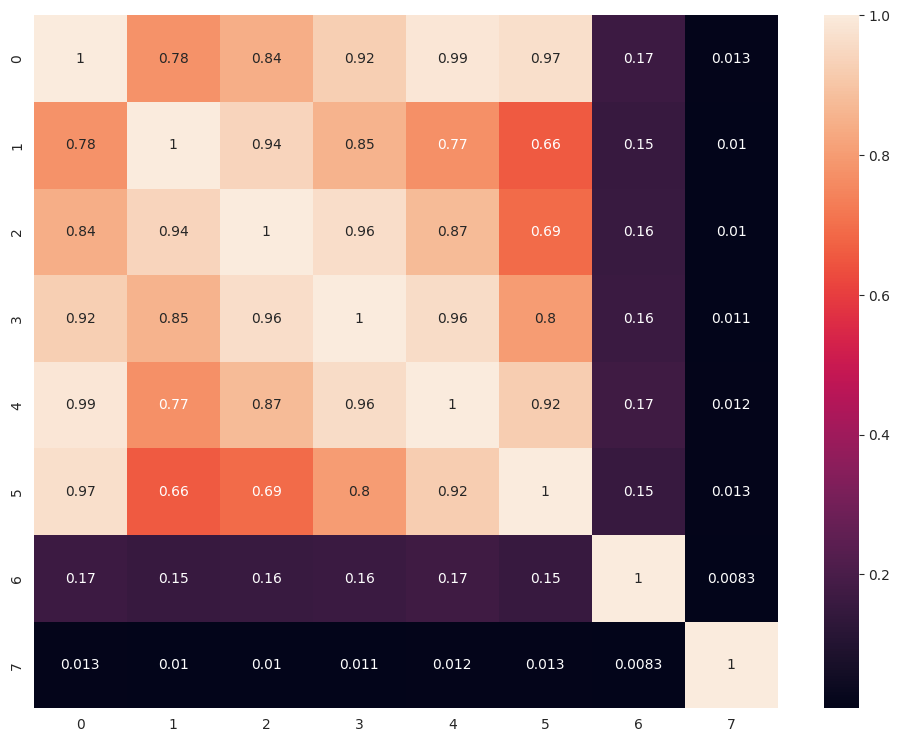

In [55]:
corr = books_df.select([
        'RatingDistTotal', 
        'RatingDist1', 
        'RatingDist2', 
        'RatingDist3', 
        'RatingDist4', 
        'RatingDist5', 
        'CountsOfReview', 
        'PagesNumber',
    ]).corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)

Seems, the number of reviews doesn't depend on number of pages and it's good news for authors

#### 5. Which years had the biggest number of books written?

Text(0, 0.5, 'Number of books')

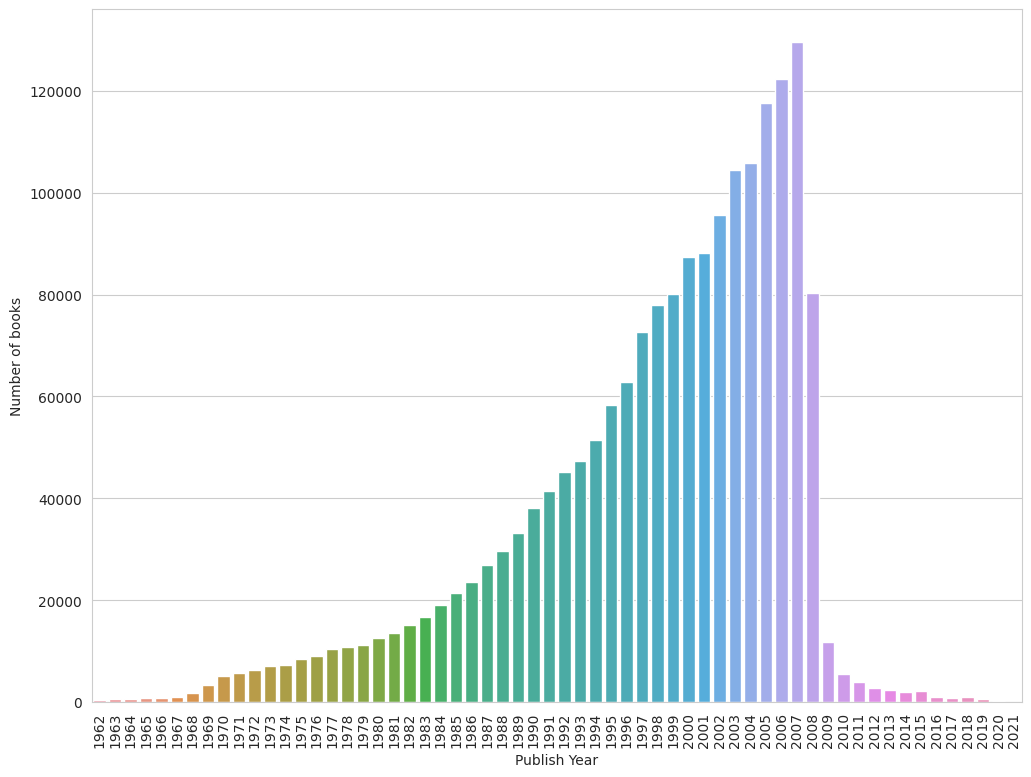

In [56]:
plt.figure(figsize=(12, 9))
books_years = sns.barplot(
    x=books_df.groupby('PublishYear').agg(pl.count('Name')).sort('PublishYear').tail(60)['PublishYear'].to_pandas(),
    y=books_df.groupby('PublishYear').agg(pl.count('Name')).sort('PublishYear').tail(60)['Name'].to_pandas()
)
books_years.set_xticklabels(books_years.get_xticklabels(), rotation=90)
books_years.set_xlabel('Publish Year')
books_years.set_ylabel('Number of books')

That's very interesting, that since 2008 such a big decrease has place! Maybe data hasn't collected well

#### 6. Is there tendency to reduce number of pages in nowaday books?

In [57]:
books = books_df.groupby('PublishYear').agg(pl.mean('PagesNumber')).sort('PublishYear').tail(50)

<AxesSubplot: xlabel='PublishYear', ylabel='PagesNumber'>

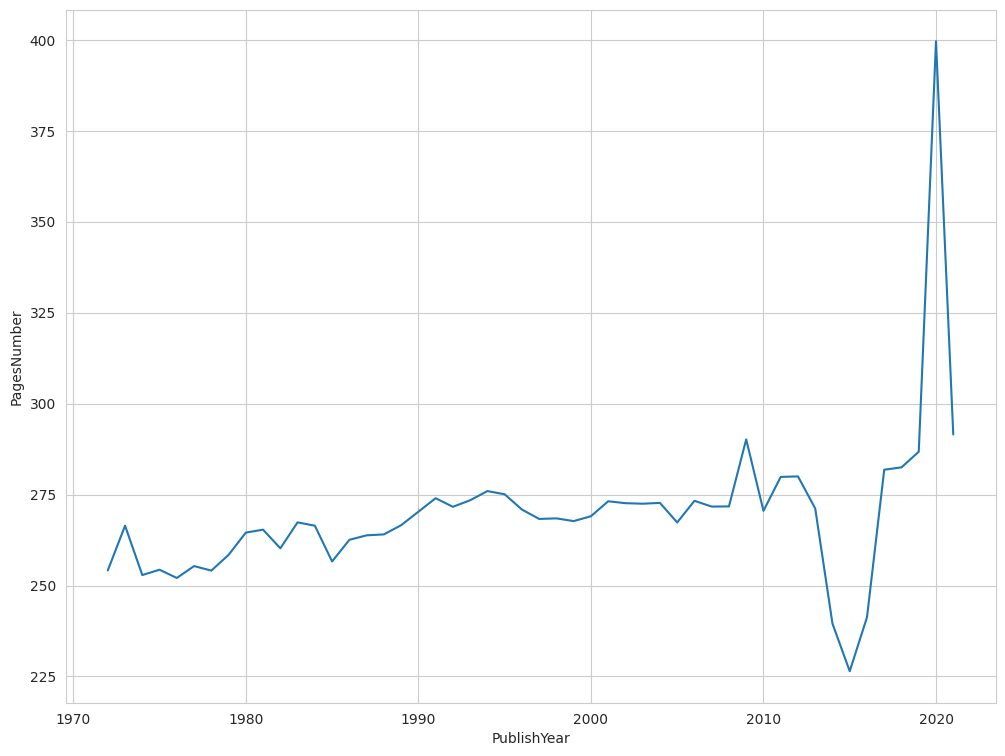

In [58]:
plt.figure(figsize=(12, 9))
sns.lineplot(x='PublishYear', y='PagesNumber', data=books)

After 1950 we see decaying curve and already nowadays number of pages is more or less stable and is near 250-300. It is hard to explain the fall to 200 pages near 2010-2015 years. Again, maybe the data was not collected efficiently. Or maybe it is somehow related to active transition to electronic devices, but at the same time slow process of e-books supply (at least in my country). Everyday people have less and less time for reading, so authors dedicate themselves less for writing. However that is terrifying situation and already a lot of organizations noticed that, so last few years I can see more actions, that attract youth to read books, more apps that make reading easier, more e-books are now available.